In [1]:
import torch, torchvision, numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, RandomRotation, RandomHorizontalFlip, \
RandomApply, ColorJitter, Grayscale, ToTensor, Lambda

import matplotlib.pyplot as plt

In [2]:
from dataset import id2class, CIFAR10Dataset, improved_jigsaw
%matplotlib inline

. 

### Verifying Images from Data Loader

.

### train

In [3]:
from dataset import CIFAR10DataModule

In [5]:
train_dl = CIFAR10DataModule().train_dataloader(augment=True, size="1k", bs=5, num_workers=0)

tensor([87, 56, 45, 88, 93])
tensor([6, 3, 0, 8, 2])
frog/
cat/
airplane/
ship/
bird/


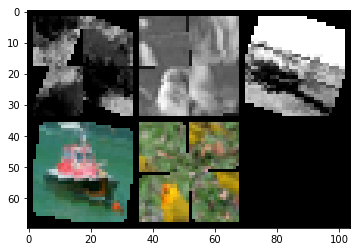

In [7]:
img, target, img_id = next(iter(train_dl))
print(img_id)
print(target)
[print(id2class(x)) for x in target]

plt.imshow(torchvision.utils.make_grid(img, nrow=3).numpy().transpose(1, 2, 0))

### val

In [8]:
val_dl = CIFAR10DataModule().val_dataloader(size="1k", bs=5, num_workers=0)

tensor([4936, 4975, 4936, 4932, 4941])
tensor([6, 9, 5, 8, 0])
frog/
truck/
dog/
ship/
airplane/


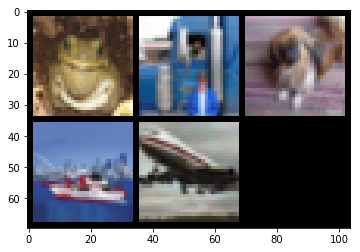

In [10]:
img, target, img_id = next(iter(val_dl))
print(img_id)
print(target)
[print(id2class(x)) for x in target]

plt.imshow(torchvision.utils.make_grid(img, nrow=3).numpy().transpose(1, 2, 0))

.

### with Dataset class + Custom Transforms

.

In [9]:
root_dir = '/scratch/vr1059/cifar10/data/'

train_transform = Compose([
    RandomRotation(25),
    RandomHorizontalFlip(),
    RandomApply([
        ColorJitter(brightness = 0.5, contrast = 0.5, saturation = 0.4, hue = (-0.5, 0.5)),
        Grayscale(3),
    ]),
    ToTensor(),
    RandomApply([
        Lambda(lambda x: improved_jigsaw(x)),
    ]),
])
train_ds = CIFAR10Dataset(root_dir, 'train', '1k', transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=5, shuffle=True)

tensor([11, 80, 72, 37, 96])
tensor([5, 4, 0, 8, 9])
dog/
deer/
airplane/
ship/
truck/


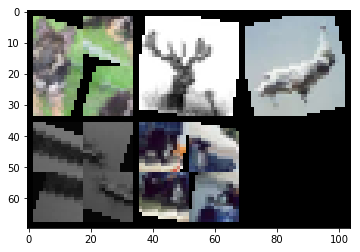

In [10]:
img, target, img_id = next(iter(train_loader))
print(img_id)
print(target)
[print(id2class(x)) for x in target]

plt.imshow(torchvision.utils.make_grid(img, nrow=3).numpy().transpose(1, 2, 0))

.

### val

In [13]:
root_dir = '/scratch/vr1059/cifar10/data/'

val_transform = Compose([
    ToTensor(),
])
val_ds = CIFAR10Dataset(root_dir, 'val', '1k', transform=val_transform)

val_loader = torch.utils.data.DataLoader(val_ds, batch_size=5, shuffle=True)

tensor([4926, 4906, 4913, 4988, 4966])
tensor([1, 3, 8, 2, 5])
automobile/
cat/
ship/
bird/
dog/


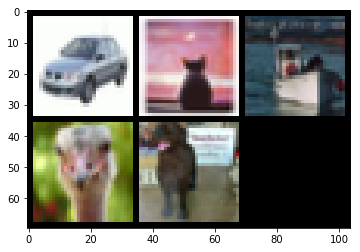

In [16]:
img, target, img_id = next(iter(val_loader))
print(img_id)
print(target)
[print(id2class(x)) for x in target]

plt.imshow(torchvision.utils.make_grid(img, nrow=3).numpy().transpose(1, 2, 0))